### Professor Brendon Epps at Dartmouth has pointed out an error in the original LDVM formulation. There is a  correction to the forces/moments resulting from the shear layer at the leading edge as detailed below.

#### The following changes result from the correction:
* The derivatives of Fourier coefficients are calculated after the 2D N-R iteration
* An additional noncirulatory contribution is added to the normal force - $$\frac{2}{U_{ref}^2} \frac{\Gamma_{lev}^n}{\Delta t}$$
where $\Gamma_{lev}^n$ is the strength of LEV shed at the current time step
* An additional noncirulatory contribution is added to the pitching moment - $$\frac{1}{U_{ref}^2} \frac{\Gamma_{lev}^n}{\Delta t}(2x_{ref}-1)$$

### Test this for published examples and compare against original LDVM

In [1]:
#Include the UNSflow libraries
#Pkg.clone("git://github.com/KiranUofG/UNSflow")
include("../src/UNSflow.jl")
using UNSflow

  likely near /home/kiran/.julia/v0.5/IJulia/src/kernel.jl:35
  likely near /home/kiran/.julia/v0.5/IJulia/src/kernel.jl:35
  likely near /home/kiran/.julia/v0.5/IJulia/src/kernel.jl:35


In [2]:
#Define pitch angle as described above
alphadef = EldRampReturnDef(25*pi/180,0.11,11)

#Plunge magnitude is constant = 0
hdef = ConstDef(0.)

#Freestream velocity is a constant. Set as constant = 1
udef = ConstDef(1.)

#The full kinematics are collected as:
full_kinem = KinemDef(alphadef, hdef, udef)

UNSflow.KinemDef(UNSflow.EldRampReturnDef(0.4363323129985824,0.11,11.0),UNSflow.ConstDef(0.0),UNSflow.ConstDef(1.0))

In [3]:
pvt = 0.0 #leading edge

lespcrit = [0.18;] #Note that the value is entered as an array. 

# The argument "FlatPlate" provides zero camber. To use an airfoil, specify the coordinate file which should be
#in the same folder. For eg. "sd7003.dat". 
#The XFOIL convention must be used for the coordinate: TE->Upper surface->LE->Lower surface->TE
surf = TwoDSurf("sd7003_fine.dat", pvt, full_kinem,lespcrit)

curfield = TwoDFlowField()

#Specify simulation details - time step, and number of steps.
#The default nondimensional timestep is 0.015. There is usually no need to change this. 

time_total = 7. #Required total time
nsteps = Int(round(time_total/0.015))

#Now the code is run as :
#The variables mat, surf and curfield are returned
mat, surf, curfield = ldvm_E(surf, curfield, nsteps)

 in depwarn(::String, ::Symbol) at ./deprecated.jl:64
 in slice(::Array{Float64,2}, ::Vararg{Any,

In [4]:
# Original LDVM

pvt = 0.0 #leading edge

lespcrit = [0.18;] #Note that the value is entered as an array. 

# The argument "FlatPlate" provides zero camber. To use an airfoil, specify the coordinate file which should be
#in the same folder. For eg. "sd7003.dat". 
#The XFOIL convention must be used for the coordinate: TE->Upper surface->LE->Lower surface->TE
surf = TwoDSurf("sd7003_fine.dat", pvt, full_kinem,lespcrit)

curfield = TwoDFlowField()

#Specify simulation details - time step, and number of steps.
#The default nondimensional timestep is 0.015. There is usually no need to change this. 

time_total = 7. #Required total time
nsteps = Int(round(time_total/0.015))

#Now the code is run as :
#The variables mat, surf and curfield are returned
mato, surfo, curfieldo = ldvm(surf, curfield, nsteps)

(
[0.015 3.88004e-12 0.0 1.0 -0.022345 0.587156 -0.00313718 -1.03687; 0.03 5.39695e-12 0.0 1.0 -0.0222257 0.106015 -0.00310377 -0.0731614; 0.045 7.50701e-12 0.0 1.0 -0.0220876 0.125843 -0.00306532 -0.0957975; 0.06 1.04421e-11 0.0 1.0 -0.0219591 0.119694 -0.00302976 -0.0881285; 0.075 1.45247e-11 0.0 1.0 -0.0218347 0.118376 -0.00299552 -0.0860156; 0.09 2.02034e-11 0.0 1.0 -0.0217141 0.117234 -0.00296253 -0.0841145; 0.105 2.81022e-11 0.0 1.0 -0.0215967 0.116533 -0.0029306 -0.0827244; 0.12 3.90894e-11 0.0 1.0 -0.0214823 0.116091 -0.00289962 -0.0816392; 0.135 5.4372e-11 0.0 1.0 -0.0213704 0.115835 -0.0028695 -0.0807742; 0.15 7.56297e-11 0.0 1.0 -0.021261 0.115713 -0.00284018 -0.0800707; 0.165 1.05199e-10 0.0 1.0 -0.0211537 0.115691 -0.0028116 -0.0794898; 0.18 1.46328e-10 0.0 1.0 -0.0210485 0.115745 -0.00278371 -0.0790044; 0.195 2.03538e-10 0.0 1.0 -0.0209453 0.115859 -0.00275648 -0.0785947; 0.21 2.83114e-10 0.0 1.0 -0.020844 0.11602 -0.00272986 -0.0782465; 0.225 3.93803e-10 0.0 1.0 -0.02074

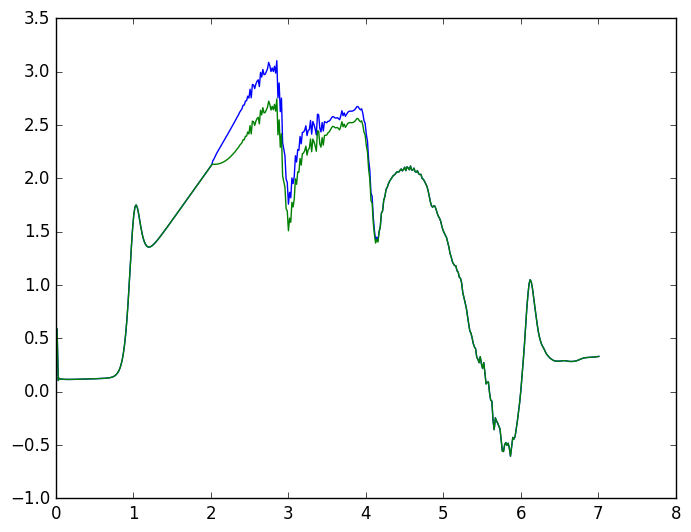

  likely near /home/kiran/.julia/v0.5/IJulia/src/kernel.jl:35
in show at /home/kiran/.julia/v0.5/PyPlot/src/PyPlot.jl


1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fb6c72ea910>

In [5]:

#Plot the lift coefficient
plot(mat[:,1],mat[:,6])
plot(mato[:,1],mato[:,6])

### There are significant differences in areas with high angle of attack and LEV shedding

### Case 2

In [6]:
#Define pitch angle as described above
alphadef = EldRampReturnDef(90*pi/180,0.4,2)

#Plunge magnitude is constant = 0
hdef = ConstDef(0.)

#Freestream velocity is a constant. Set as constant = 1
udef = ConstDef(1.)

#The full kinematics are collected as:
full_kinem = KinemDef(alphadef, hdef, udef)

pvt = 1.0 #trailing edge

lespcrit = [0.14;] #Note that the value is entered as an array. 

# The argument "FlatPlate" provides zero camber. To use an airfoil, specify the coordinate file which should be
#in the same folder. For eg. "sd7003.dat". 
#The XFOIL convention must be used for the coordinate: TE->Upper surface->LE->Lower surface->TE
surf = TwoDSurf("sd7003_fine.dat", pvt, full_kinem,lespcrit)

curfield = TwoDFlowField()

#Specify simulation details - time step, and number of steps.
#The default nondimensional timestep is 0.015. There is usually no need to change this. 

time_total = 7. #Required total time
nsteps = Int(round(time_total/0.015))

#Now the code is run as :
#The variables mat, surf and curfield are returned
mat, surf, curfield = ldvm_E(surf, curfield, nsteps)

surf = TwoDSurf("sd7003_fine.dat", pvt, full_kinem,lespcrit)
curfield = TwoDFlowField()
mato, surfo, curfieldo = ldvm(surf, curfield, nsteps)


(
[0.015 0.00395241 0.0 1.0 -0.0262402 0.18146 -0.00360909 -0.761031; 0.03 0.00419433 0.0 1.0 -0.0263555 0.0818426 -0.00402112 0.00808255; 0.045 0.0044509 0.0 1.0 -0.0264657 0.100312 -0.00395451 0.0038198; 0.06 0.00472298 0.0 1.0 -0.0266 0.0926983 -0.00400795 0.00381015; 0.075 0.00501149 0.0 1.0 -0.0267536 0.0898448 -0.00404703 0.00299132; 0.09 0.0053174 0.0 1.0 -0.0269272 0.0870897 -0.00409275 0.00205041; 0.105 0.00564173 0.0 1.0 -0.027121 0.0846934 -0.00414385 0.000946952; 0.12 0.00598555 0.0 1.0 -0.0273356 0.0824728 -0.00420144 -0.000297004; 0.135 0.00635001 0.0 1.0 -0.0275715 0.080351 -0.00426627 -0.00167486; 0.15 0.00673629 0.0 1.0 -0.0278297 0.0782739 -0.00433909 -0.00318337; 0.165 0.00714566 0.0 1.0 -0.0281108 0.0762049 -0.00442066 -0.0048217; 0.18 0.00757946 0.0 1.0 -0.0284158 0.074118 -0.00451178 -0.00659046; 0.195 0.00803908 0.0 1.0 -0.0287458 0.071994 -0.00461331 -0.00849111; 0.21 0.00852599 0.0 1.0 -0.0291016 0.0698187 -0.00472617 -0.0105257; 0.225 0.00904176 0.0 1.0 -0.029

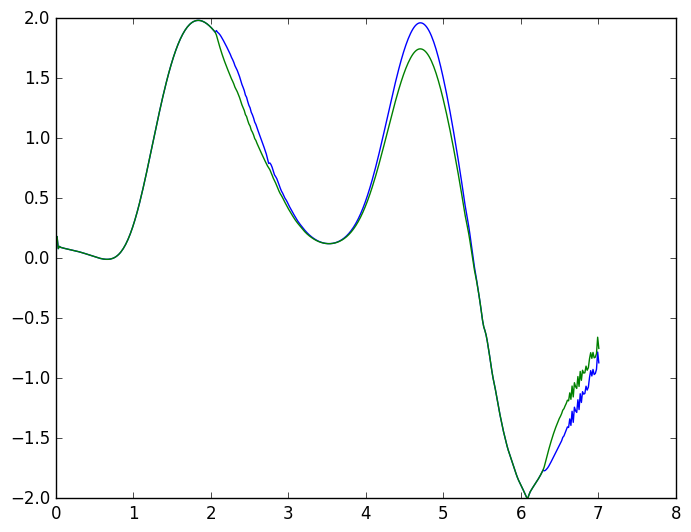

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fb6c46aff90>

In [9]:

#Plot the lift coefficient
plot(mat[:,1],mat[:,6])
plot(mato[:,1],mato[:,6])

### Case 3A

In [10]:
#Say we want to run the simulation for 5 cycles of motion.
ncyc = 5
alpha_mean = 4.*pi/180
alpha_amp = 22.5*pi/180
h_amp = 0.05
k = 3.93
phi = 90*pi/180 
T = pi/k # time period
t_tot = ncyc*T

#Define pitch and plunge as described above
alphadef = CosDef(alpha_mean, alpha_amp, k, phi)

hdef = CosDef(0., h_amp, k, 0.)

#Freestream velocity is a constant. Set as constant = 1
udef = ConstDef(1.)

#The full kinematics are collected as:
full_kinem = KinemDef(alphadef, hdef, udef)

pvt = 0.75 #three-quarter chord

lespcrit = 0.21

surf = TwoDSurf("sd7003_fine.dat", pvt, full_kinem)

curfield = TwoDFlowField()

#Specify simulation details - time step, and number of steps.
#The default nondimensional timestep is 0.015. There is usually no need to change this. 

dtstar = find_tstep([alphadef hdef])
nsteps = Int(round(t_tot/dtstar))

#Now the code is run as :
#The variables mat, surf and curfield are returned
mat, surf, curfield = ldvm_E(surf, curfield, nsteps, dtstar)

surf = TwoDSurf("sd7003_fine.dat", pvt, full_kinem)
curfield = TwoDFlowField()
mato, surfo, curfieldo = ldvm(surf, curfield, nsteps, dtstar)



(
[0.00194388 0.0638134 0.0499942 1.0 5.25985e-6 684.326 43.7286 323.763; 0.00388775 0.057815 0.0499767 1.0 5.26337e-6 -2.67447 -0.154797 6.96653; 0.00583163 0.0518195 0.0499475 1.0 5.40851e-6 0.862959 0.0447582 9.49865; 0.00777551 0.0458281 0.0499067 1.0 5.56803e-6 3.91503 0.179544 10.457; 0.00971939 0.0398423 0.0498542 1.0 5.69263e-6 5.88484 0.23459 10.9306; 0.0116633 0.0338636 0.04979 1.0 5.77689e-6 6.52189 0.220939 10.4383; 0.0136071 0.0278932 0.0497143 1.0 5.82242e-6 6.71503 0.187352 8.54641; 0.015551 0.0219326 0.049627 1.0 5.85189e-6 7.12217 0.156233 7.4468; 0.0174949 0.0159832 0.049528 1.0 5.88257e-6 7.1939 0.114991 7.7992; 0.0194388 0.0100463 0.0494175 1.0 5.90782e-6 6.8797 0.0691182 8.38036; 0.0213826 0.00412345 0.0492955 1.0 5.91711e-6 6.43982 0.0265544 8.44446; 0.0233265 -0.00178412 0.049162 1.0 5.90836e-6 5.97992 -0.0106689 7.68156; 0.0252704 -0.00767496 0.0490169 1.0 5.88734e-6 5.61574 -0.0431015 7.01933; 0.0272143 -0.0135477 0.0488605 1.0 5.86366e-6 5.2236 -0.0707722 7.24

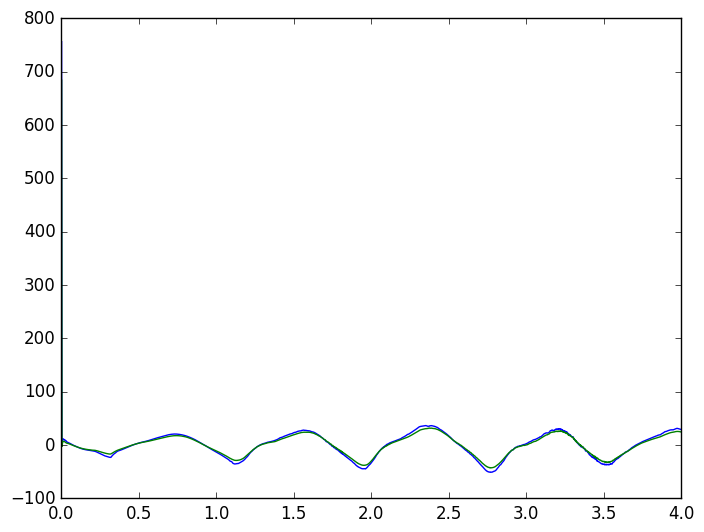

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fb6c45fc5d0>

In [11]:

#Plot the lift coefficient
plot(mat[:,1],mat[:,6])
plot(mato[:,1],mato[:,6])

### Case 3B

In [12]:
#Say we want to run the simulation for 5 cycles of motion.
ncyc = 5
alpha_mean = 4.*pi/180
alpha_amp = 0.*pi/180
h_amp = 0.5
k = 0.393
phi = 0.*pi/180 
T = pi/k # time period
t_tot = ncyc*T

#Define pitch and plunge as described above
alphadef = ConstDef(alpha_mean)

hdef = CosDef(0., h_amp, k, 0.)

#Freestream velocity is a constant. Set as constant = 1
udef = ConstDef(1.)

#The full kinematics are collected as:
full_kinem = KinemDef(alphadef, hdef, udef)

pvt = 0.0 #doesn't matter here

lespcrit = 0.21

surf = TwoDSurf("sd7003_fine.dat", pvt, full_kinem, lespcrit)

curfield = TwoDFlowField()

#Specify simulation details - time step, and number of steps.
#The default nondimensional timestep is 0.015. There is usually no need to change this. 

dtstar = find_tstep([hdef])
nsteps = Int(round(t_tot/dtstar))

#Now the code is run as :
#The variables mat, surf and curfield are returned
mat, surf, curfield = ldvm_E(surf, curfield, nsteps, dtstar)

surf = TwoDSurf("sd7003_fine.dat", pvt, full_kinem, lespcrit)

curfield = TwoDFlowField()
mato, surfo, curfieldo = ldvm(surf, curfield, nsteps, dtstar)



LoadError: LoadError: MethodError: Cannot `convert` an object of type Float64 to an object of type Array{Float64,1}
This may have arisen from a call to the constructor Array{Float64,1}(...),
since type constructors fall back to convert methods.
while loading In[12], in expression starting on line 26

In [ ]:
#Plot the lift coefficient
plot(mat[:,1],mat[:,6])
plot(mato[:,1],mato[:,6])

### Case 3C

In [13]:
#Say we want to run the simulation for 5 cycles of motion.
ncyc = 5
alpha_mean = 4.*pi/180
alpha_amp = 19.9*pi/180
h_amp = 0.5
k = 0.393
phi = 69.8*pi/180 
T = pi/k # time period
t_tot = ncyc*T

#Define pitch and plunge as described above
alphadef = CosDef(alpha_mean, alpha_amp, k, phi)

hdef = CosDef(0., h_amp, k, 0.)

#Freestream velocity is a constant. Set as constant = 1
udef = ConstDef(1.)

#The full kinematics are collected as:
full_kinem = KinemDef(alphadef, hdef, udef)

pvt = 0.0 #doesn't matter here

lespcrit = 0.21

surf = TwoDSurf("sd7003_fine.dat", pvt, full_kinem, lespcrit)

curfield = TwoDFlowField()

#Specify simulation details - time step, and number of steps.
#The default nondimensional timestep is 0.015. There is usually no need to change this. 

#dtstar = minimum([0.015*0.2/(k*alpha_amp) 0.015*0.2/(k*h_amp)])
dtstar = find_tstep([alphadef hdef])
nsteps = Int(round(t_tot/dtstar))

#Now the code is run as :
#The variables mat, surf and curfield are returned
mat, surf, curfield = ldvm_E(surf, curfield, nsteps, dtstar)

surf = TwoDSurf("sd7003_fine.dat", pvt, full_kinem, lespcrit)
curfield = TwoDFlowField()
mato, surfo, curfieldo = ldvm(surf, curfield, nsteps, dtstar)


LoadError: LoadError: MethodError: Cannot `convert` an object of type Float64 to an object of type Array{Float64,1}
This may have arisen from a call to the constructor Array{Float64,1}(...),
since type constructors fall back to convert methods.
while loading In[13], in expression starting on line 26

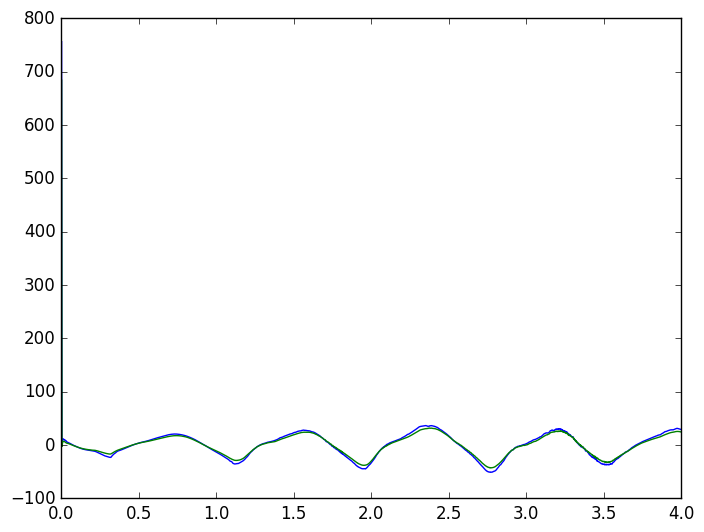

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fb6c453a7d0>

In [14]:

#Plot the lift coefficient
plot(mat[:,1],mat[:,6])
plot(mato[:,1],mato[:,6])

### Case 4

In [15]:
#Say we want to run the simulation for 5 cycles of motion.
ncyc = 5
alpha_mean = 0.*pi/180
alpha_amp = 76.33*pi/180
h_amp = 1.0
k = 0.377
phi = 90.0*pi/180 
T = pi/k # time period
t_tot = ncyc*T

#Define pitch and plunge as described above
alphadef = CosDef(alpha_mean, alpha_amp, k, phi)

hdef = CosDef(0., h_amp, k, 0.)

#Freestream velocity is a constant. Set as constant = 1
udef = ConstDef(1.)

#The full kinematics are collected as:
full_kinem = KinemDef(alphadef, hdef, udef)

pvt = 1./3. #doesn't matter here

lespcrit = [0.19;]

surf = TwoDSurf("FlatPlate", pvt, full_kinem, lespcrit)

curfield = TwoDFlowField()

#Arguments are (enable(1)/disable , minimum number of vortices required to enable deletion scheme,
#number of chordlengths from airfoil at which to delete)
del = DelVortDef(1, 500, 10)

#Specify simulation details - time step, and number of steps.
#The default nondimensional timestep is 0.015. There is usually no need to change this. 

#dtstar = minimum([0.015*0.2/(k*alpha_amp) 0.015*0.2/(k*h_amp)])
dtstar = find_tstep([alphadef hdef])
nsteps = Int(round(t_tot/dtstar))

#Now the code is run as :
#The variables mat, surf and curfield are returned
mat, surf, curfield = ldvm_E(surf, curfield, nsteps, dtstar, del)

surf = TwoDSurf("FlatPlate", pvt, full_kinem, lespcrit)
curfield = TwoDFlowField()
del = DelVortDef(1, 500, 10)
mato, surfo, curfieldo = ldvm(surf, curfield, nsteps, dtstar, del)



(
[0.0059732 -0.00599998 0.99999 1.0 0.0375066 -51.32 0.299084 21.7069; 0.0119464 -0.0119998 0.999959 1.0 0.0357419 -1.6926 0.0122846 0.0258568; 0.0179196 -0.0179995 0.999909 1.0 0.0336283 -2.44564 0.0369184 0.563253; 0.0238928 -0.0239987 0.999838 1.0 0.0313415 -2.82676 0.0616779 0.831105; 0.029866 -0.0299975 0.999746 1.0 0.0290428 -2.85664 0.0804155 0.822083; 0.0358392 -0.0359956 0.999635 1.0 0.0267369 -2.88045 0.0992338 0.814422; 0.0418124 -0.041993 0.999503 1.0 0.0244396 -2.87448 0.117023 0.794565; 0.0477856 -0.0479896 0.999351 1.0 0.0221624 -2.8456 0.133574 0.762991; 0.0537588 -0.0539852 0.999179 1.0 0.0199062 -2.81521 0.149634 0.732533; 0.059732 -0.0599797 0.998986 1.0 0.0176677 -2.79045 0.165606 0.706289; 0.0657052 -0.065973 0.998773 1.0 0.0154418 -2.77446 0.181804 0.685222; 0.0716784 -0.071965 0.99854 1.0 0.0132233 -2.76824 0.19846 0.669563; 0.0776516 -0.0779554 0.998286 1.0 0.0110075 -2.77063 0.215661 0.65873; 0.0836248 -0.0839444 0.998013 1.0 0.00879153 -2.77897 0.233341 0.651

In [ ]:
#Plot the lift coefficient
plot(mat[:,1],mat[:,6])
plot(mato[:,1],mato[:,6])

### Case 5A

In [17]:
#Define pitch angle 
alphadef = EldUpDef(90*pi/180,0.2,11)

#Plunge magnitude is constant = 0
hdef = ConstDef(0.)

#Freestream velocity is a constant. Set as constant = 1
udef = ConstDef(1.)

#The full kinematics are collected as:
full_kinem = KinemDef(alphadef, hdef, udef)

pvt = 0.0 #leading edge

lespcrit = [0.11;] #Note that the value is entered as an array. 

# The argument "FlatPlate" provides zero camber. To use an airfoil, specify the coordinate file which should be
#in the same folder. For eg. "sd7003.dat". 
#The XFOIL convention must be used for the coordinate: TE->Upper surface->LE->Lower surface->TE
surf = TwoDSurf("sd7003_fine.dat", pvt, full_kinem,lespcrit)

curfield = TwoDFlowField()

#Specify simulation details - time step, and number of steps.
#The default nondimensional timestep is 0.015. There is usually no need to change this. 

time_total = 5. #Required total time
nsteps = Int(round(time_total/0.015))

#Now the code is run as :
#The variables mat, surf and curfield are returned
mat, surf, curfield = ldvm_E(surf, curfield, nsteps)

surf = TwoDSurf("sd7003_fine.dat", pvt, full_kinem,lespcrit)
curfield = TwoDFlowField()
mato, surfo, curfieldo = ldvm_E(surf, curfield, nsteps)


(
[0.015 0.928557 0.0 1.0 0.110005 53.9591 72.008 4.12771; 0.03 0.927845 0.0 1.0 0.110004 3.42177 4.44077 19.6501; 0.045 0.927132 0.0 1.0 0.110005 4.03529 5.25187 10.4787; 0.06 0.92642 0.0 1.0 0.110005 3.41793 4.42236 11.1358; 0.075 0.925707 0.0 1.0 0.110005 3.01682 3.88268 9.1918; 0.09 0.924994 0.0 1.0 0.110006 2.74878 3.52118 6.93537; 0.105 0.92428 0.0 1.0 0.110006 2.5493 3.25159 4.52418; 0.12 0.923566 0.0 1.0 0.110006 2.38821 3.03357 2.26369; 0.135 0.922852 0.0 1.0 0.110005 2.33804 2.96272 1.5912; 0.15 0.922138 0.0 1.0 0.110005 2.41607 3.0612 3.0348; 0.165 0.921424 0.0 1.0 0.110005 2.48156 3.14285 4.53449; 0.18 0.920709 0.0 1.0 0.110006 2.46923 3.1219 5.1058; 0.195 0.919994 0.0 1.0 0.110006 2.4183 3.05033 5.16381; 0.21 0.919279 0.0 1.0 0.110006 2.35824 2.96698 5.07295; 0.225 0.918564 0.0 1.0 0.110006 2.29782 2.8834 4.94686; 0.24 0.917849 0.0 1.0 0.110006 2.24578 2.81102 4.74695; 0.255 0.917133 0.0 1.0 0.110006 2.21748 2.76985 4.41631; 0.27 0.916417 0.0 1.0 0.110006 2.22181 2.77131 4

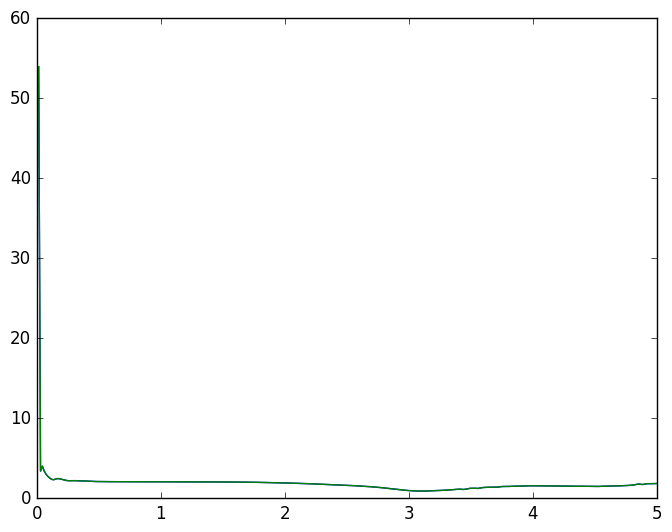

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fb6c4407910>

In [18]:
#Plot the lift coefficient
plot(mat[:,1],mat[:,6])
plot(mato[:,1],mato[:,6])

In [19]:
### Case 5B

In [20]:
#Define pitch angle 
alphadef = EldUpDef(45*pi/180,0.4,11)

#Plunge magnitude is constant = 0
hdef = ConstDef(0.)

#Freestream velocity is a constant. Set as constant = 1
udef = ConstDef(1.)

#The full kinematics are collected as:
full_kinem = KinemDef(alphadef, hdef, udef)

pvt = 0.0 #leading edge

lespcrit = [0.11;] #Note that the value is entered as an array. 

# The argument "FlatPlate" provides zero camber. To use an airfoil, specify the coordinate file which should be
#in the same folder. For eg. "sd7003.dat". 
#The XFOIL convention must be used for the coordinate: TE->Upper surface->LE->Lower surface->TE
surf = TwoDSurf("sd7003_fine.dat", pvt, full_kinem,lespcrit)

curfield = TwoDFlowField()

#Specify simulation details - time step, and number of steps.
#The default nondimensional timestep is 0.015. There is usually no need to change this. 

time_total = 9. #Required total time
nsteps = Int(round(time_total/0.015))

#Now the code is run as :
#The variables mat, surf and curfield are returned
mat, surf, curfield = ldvm_E(surf, curfield, nsteps)

surf = TwoDSurf("sd7003_fine.dat", pvt, full_kinem,lespcrit)
curfield = TwoDFlowField()
mato, surfo, curfieldo = ldvm(surf, curfield, nsteps)


(
[0.015 0.531415 0.0 1.0 0.110004 44.754 26.2191 -24.2624; 0.03 0.530123 0.0 1.0 0.110004 1.18099 0.604032 0.167109; 0.045 0.528828 0.0 1.0 0.110005 1.63231 0.865767 -0.317929; 0.06 0.52753 0.0 1.0 0.110005 1.67749 0.889314 -0.341427; 0.075 0.526228 0.0 1.0 0.110005 1.55361 0.814503 -0.283311; 0.09 0.524923 0.0 1.0 0.110005 1.45721 0.756033 -0.237763; 0.105 0.523615 0.0 1.0 0.110005 1.42 0.732068 -0.216015; 0.12 0.522303 0.0 1.0 0.110005 1.40948 0.723599 -0.21207; 0.135 0.520988 0.0 1.0 0.110005 1.4074 0.720006 -0.216947; 0.15 0.51967 0.0 1.0 0.110005 1.40868 0.718339 -0.226135; 0.165 0.518349 0.0 1.0 0.110005 1.41316 0.718493 -0.236694; 0.18 0.517024 0.0 1.0 0.110005 1.4199 0.719916 -0.247901; 0.195 0.515697 0.0 1.0 0.110005 1.42616 0.721034 -0.258264; 0.21 0.514366 0.0 1.0 0.110005 1.43051 0.721056 -0.265339; 0.225 0.513032 0.0 1.0 0.110005 1.43368 0.720393 -0.267831; 0.24 0.511695 0.0 1.0 0.110005 1.43674 0.719649 -0.266573; 0.255 0.510355 0.0 1.0 0.110005 1.43514 0.716293 -0.26058